## Mall Customer Segmentation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#import and inspect data

data=pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df=data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# clean and prepare

In [8]:
#drop irrelevant columns

df.drop(columns='CustomerID', inplace=True)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [9]:
#scale relevant columns

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])


In [14]:
#find the optimal k by using the elbow method and apply the KMeans

import os
os.environ["OMP_NUM_THREADS"] ='1'

In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(scaled_df)
df['Cluster'] = kmeans.labels_

C:\Users\vanre\anacondanew\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [22]:
#convert from object types to numeric

df['Annual Income (k$)'] = pd.to_numeric(df['Annual Income (k$)'], errors='coerce')
df['Spending Score (1-100)'] = pd.to_numeric(df['Spending Score (1-100)'], errors='coerce')
df['Cluster'] = df['Cluster'].astype(int)

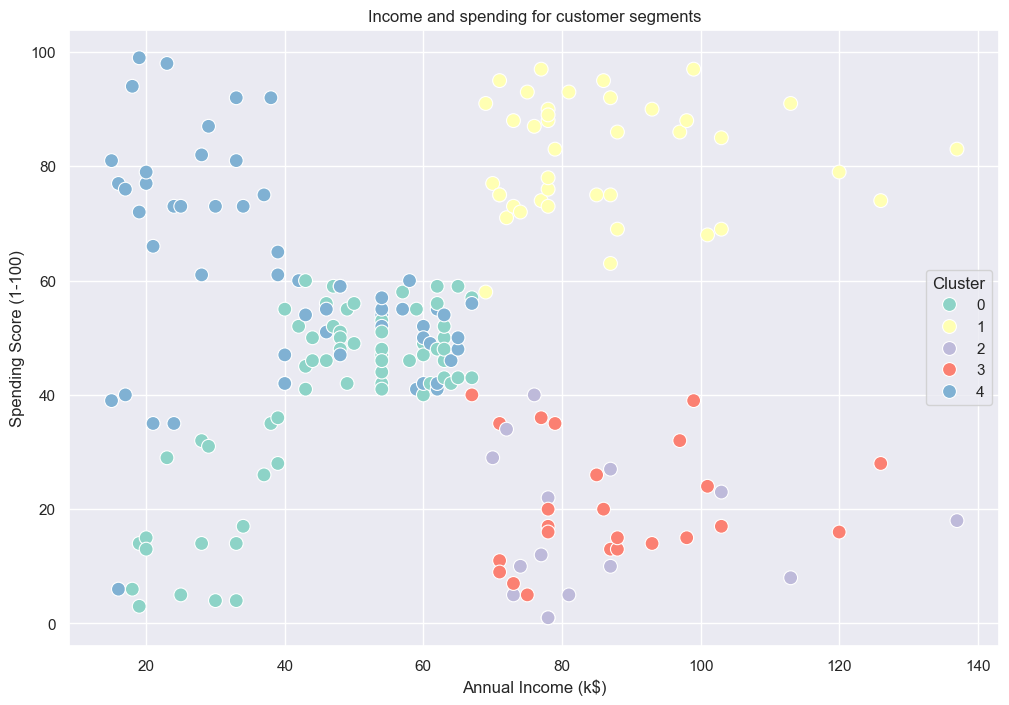

In [28]:
# income vs spending 2D plot

plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set3', s=100)
plt.title('Income and spending for customer segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

Cluster 0: Low to medium income, low to medium spending. They usually spend around what they can afford, sensitive to prices.

Cluster 1: High income, spending a lot and within their means. They are most likely high value customers.

Cluster 2: High income, low spending. These customers might be price-conscious. Low engagement.

Cluster 3: Medium to high income, low spending. This group is probably budget-conscious.

Cluster 4: Low income, high spending. This group is probably impulse buyers, and they are loyal customers.

Insights: We could offer loyalty points to cluster 4, and offer loyalty deals to cluster 2/3 (they have the means to afford to buy more).

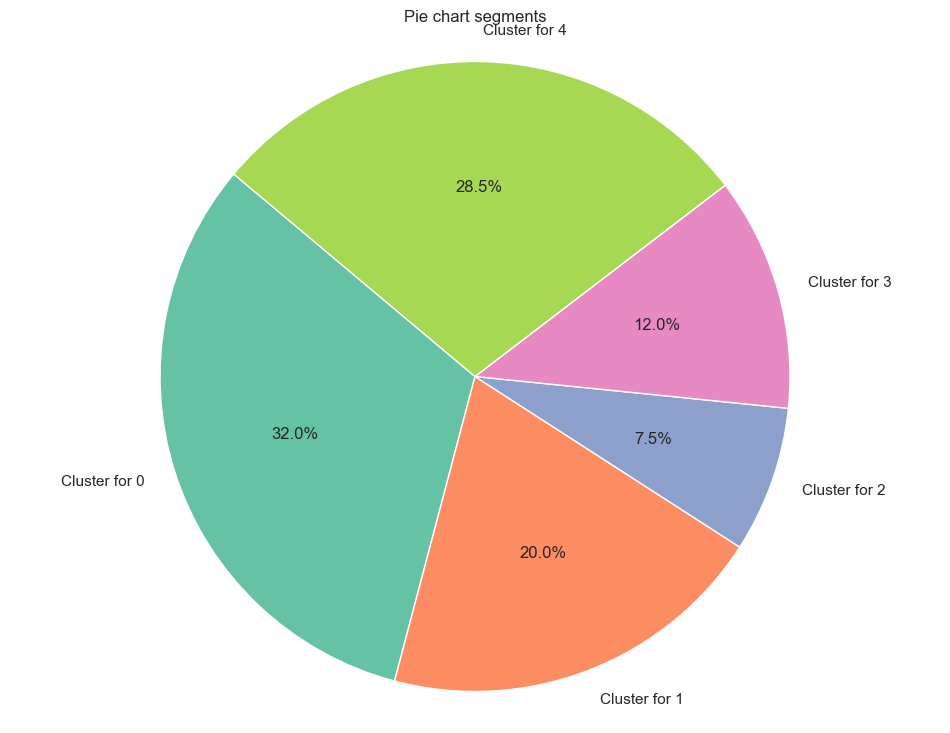

In [30]:
# create segment pie chart

count_clus=df['Cluster'].value_counts().sort_index()

plt.figure(figsize=(12,9))
plt.pie(count_clus, labels=[f'Cluster for {i}'for i in count_clus.index],autopct='%1.1f%%',startangle=140,colors=sns.color_palette('Set2'))
plt.title('Pie chart segments')
plt.axis('equal')
plt.show()

Clusters 0 and 4 together account for more than 60% of the customers. Compared to other clusters, Clusters 0 and 4 have lower incomes but higher spending scores. Cluster 2 is the group with higher incomes, but their spending score is only 7.5%. We should offer them more premium deals so they can potentially bring up their spending scores. Cluster 3 is the least valuable segment when thinking about revenue. We could possibly offer discount deals or budget friendly deals.
